# Modelo de recomendação de produtos da Amazon (Automotive_5.json)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)
reviews = pd.read_json('Automotive_5.json', lines = True)

#### Descrição do Dataset:
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- vote - helpful votes of the review
- style - a dictionary of the product metadata, e.g., "Format" is "Hardcover"
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)
- image - images that users post after they have received the product

In [2]:
display(reviews.head(15))

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,1430438400,NaN,NaN
1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,It sucks barely picks up anything definitely n...,sucks,1524096000,NaN,NaN
2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,"Well to write a short one, it blew 2 fuses of ...",Defective,1523836800,NaN,NaN
3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},Lauren,I have absolutely no memory of buying this but...,Looks cool! Probably works,1523577600,NaN,NaN
4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,it ok it does it job,Five Stars,1523145600,NaN,NaN
5,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},Karen H.,Have 3 big dogs. this have been great for my F...,this have been great for my Ford transit connect,1521849600,NaN,NaN
6,3,True,"03 4, 2018",A2MPTQ85HBBNG2,0209688726,{'Color:': ' Black'},Giv,"Pros: Good attachments, nice long cord, can re...",Decent car vaccuum.,1520121600,NaN,NaN
7,2,True,"03 1, 2018",A1SPIM9Y6HUUSH,0209688726,{'Color:': ' Black'},Frank W.Brodeur,I have a 2017 outback and everytime I try to u...,Two Stars,1519862400,NaN,NaN
8,4,True,"02 22, 2018",A1Q6FHU6DA643L,0209688726,{'Color:': ' Black'},nutter1,very good suction will see how it lasts,Four Stars,1519257600,NaN,NaN
9,5,True,"01 29, 2018",A3MA15RJJ59OKG,0209688726,{'Color:': ' Black'},Daryl S.,"love it,works great ! wow !!",Five Stars,1517184000,NaN,NaN


## Análise e Limpeza dos Dados

### Informações Gerais

In [3]:
reviews.shape
print("Número de Linhas: ", reviews.shape[0])
print("Número de Colunas: ", reviews.shape[1])

Número de Linhas:  1711519
Número de Colunas:  12


In [4]:
print('Colunas com valores null: \n',reviews.isnull().sum())

Colunas com valores null: 
 overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style             1118104
reviewerName          140
reviewText            866
summary               342
unixReviewTime          0
vote              1520651
image             1668825
dtype: int64


In [5]:
reviews.describe()

,overall,unixReviewTime
count,1711519.000000,1711519.000000
mean,4.459656,1454262583.608596
std,1.055129,49138282.476415
min,1.000000,968889600.000000
25%,4.000000,1424908800.000000
50%,5.000000,1460678400.000000
75%,5.000000,1490659200.000000
max,5.000000,1538524800.000000


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711519 entries, 0 to 1711518
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 145.3+ MB


In [7]:
print('Quantidade de Usuários: ', reviews['reviewerID'].nunique())
print('Quantidade de Produtos: ', reviews['asin'].nunique())

Quantidade de Usuários:  193651
Quantidade de Produtos:  79437


#### Atributos que não serão utilizados

In [8]:
reviews.drop(['reviewerName', 'reviewTime', 'unixReviewTime', 'style', 'verified', 'image' ], axis=1, inplace=True)

#### Distribuição do número de avaliações por produto

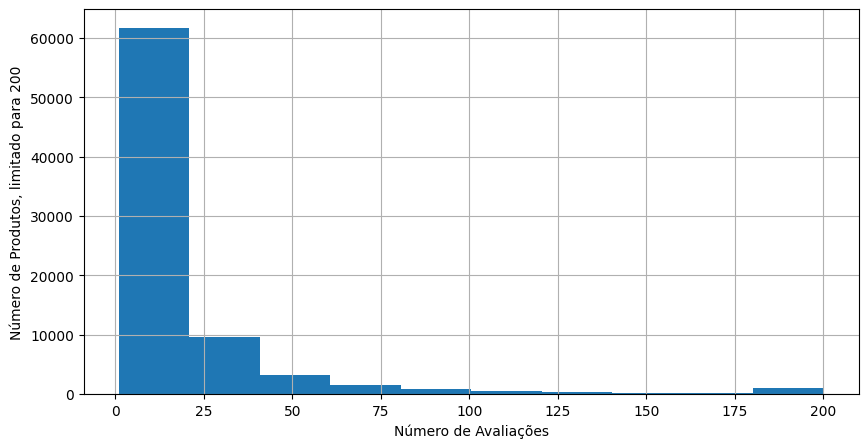

In [9]:
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import math

distribution = reviews.groupby('asin')['overall'].count().clip(upper=200)
distribution.hist(figsize=(10,5))
plt.ylabel("Número de Produtos, limitado para 200")
plt.xlabel("Número de Avaliações")
plt.show()

#### Recuperando a média da avaliação e a quantidade de vezes que cada produto aparece

Nós vamos utilizar o "dfMerged" para juntar todos os reviews de cada produto. Dessa forma, uma única tupla irá conter todas as palavras de reviews e descrição para cada produto, fazendo com que o KNN consiga avaliar a similaridade dessas palavras por produto. Note que as colunas que terminam em y representam a contagem de avaliações, reviews e votos. A última coluna representa a avaliação média daquele produto.

In [10]:
count = reviews.groupby("asin", as_index=False).count()
mean = reviews.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(reviews, count, how='right', on=['asin'])
dfMerged = pd.merge(dfMerged, mean, how='right', on=['asin'])
dfMerged

,overall_x,reviewerID_x,asin,reviewText_x,summary_x,vote_x,overall_y,reviewerID_y,reviewText_y,summary_y,vote_y,overall
0,4,A8WEXFRWX1ZHH,0209688726,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,NaN,71,71,71,71,11,4.042254
1,1,ABCA1A8E4DGV1,0209688726,It sucks barely picks up anything definitely n...,sucks,NaN,71,71,71,71,11,4.042254
2,1,A1NX8HM89FRQ32,0209688726,"Well to write a short one, it blew 2 fuses of ...",Defective,NaN,71,71,71,71,11,4.042254
3,3,A1X77G023NY0KY,0209688726,I have absolutely no memory of buying this but...,Looks cool! Probably works,NaN,71,71,71,71,11,4.042254
4,5,A3GK37JO2MGW6Q,0209688726,it ok it does it job,Five Stars,NaN,71,71,71,71,11,4.042254
...,...,...,...,...,...,...,...,...,...,...,...,...
1711514,5,A73IGP6LB5WDM,B01HJI17Y8,"A breeze to install, and brighter that OEM. Do...",An improvement.,NaN,8,8,8,8,0,4.500000
1711515,1,A261FYJ5MTGSUJ,B01HJI17Y8,"They're not that bright, my regular halogen ar...",One Star,NaN,8,8,8,8,0,4.500000
1711516,5,A1PSKAPFER6BZW,B01HJI17Y8,Wow! So bright. I can see so much farther. Lig...,Drastically improves night vision.,NaN,8,8,8,8,0,4.500000
1711517,5,A1MJUNTX7CTR5U,B01HJI17Y8,Way better than stock. Nice bright and white. ...,"NICE, BRIGHT AND WHITE",NaN,8,8,8,8,0,4.500000


#### Distribuição das avaliações 

Aqui é interessante notar que a grande maioria dos usuários avalia com mais frequência com nota 5 a sua review. Isso pode ser influenciado pela própria Amazon, que incentiva a avaliação por parte dos usuários e a nota 5 exige menos esforço (não é necessário apontar os defeitos). Seria interessante também avaliar a quantidade de palavras escritas na review por nota, para verificar se a nota 5 possui menos do que as demais.

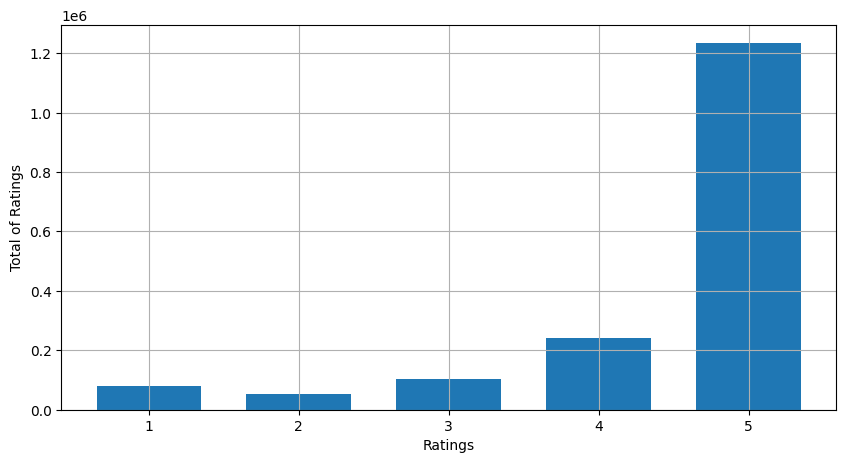

In [11]:
data = dfMerged.rename(columns={'reviewerID_y': 'reviews_count', 'summary_x': 'product_summary', 'overall': 'avg_rating'})

reviews['overall'].hist(bins=range(1,7), figsize=(10,5),  align='left', rwidth=0.7)
plt.ylabel("Total of Ratings")
plt.xlabel("Ratings")
plt.show()

## Aplicação dos Métodos de Recomendação

### 1. Collaborative Filtering com SVD (Singular Value Decomposition)

#### Separando apenas o ID do usuário, o ID do produto e a nota
Apenas estes atributos de interesse serão utilizados.

In [ ]:
data_svd = dfMerged[['reviewerID_x', 'asin', 'overall_x', 'overall_y']]
data_svd = data_svd.rename(columns={'reviewerID_x': 'user_id', 'asin': 'product_id', 'overall_x': 'rating', 'overall_y': 'reviews_count'})
data_svd = data_svd[data_svd.reviews_count > 50] # Filtrando apenas para os produtos avaliados mais de 50 vezes
data_svd = data_svd[['user_id', 'product_id', 'rating']]

#### Aplicação do Modelo

In [ ]:
from surprise import Reader, Dataset
from surprise.model_selection import KFold

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data_svd, reader=reader)

kfold = KFold()

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
import numpy as np

svd = SVD()
resultados = cross_validate(svd, data, measures=['rmse', 'mae'], cv=kfold, return_train_measures=True)
print("RMSE:", resultados['test_rmse'].mean())
print("MAE:", resultados['test_mae'].mean())

#### Tuning de hiperparâmetros

In [ ]:
from surprise.model_selection.search import GridSearchCV

param_grid = { 
    'n_factors': [60, 70, 80, 90, 100],
}

gs_svd = GridSearchCV(SVD, param_grid=param_grid, cv=kfold) # Grid Search SVD
gs_svd.fit(data)
gs_svd.best_params

In [ ]:
tuned_svd = SVD(n_factors=gs_svd.best_params['rmse']['n_factors'])
resultados = cross_validate(tuned_svd, data, measures=['rmse', 'mae'], cv=kfold, return_train_measures=True)
print("RMSE:", resultados['test_rmse'].mean())
print("MAE:", resultados['test_mae'].mean())

### 2. KNN - Utilizando palavras para recomendação

Os textos primeiro tem que ser tratados para depois conseguir utilizar o KNN. É importante notar que foram utilizados apenas produtos com mais de 100 reviews. Caso contrário, a matriz seria esparsa demais e isso iria afetar significativamente o desempenho do sistema de recomendação.

In [12]:
dfMerged

dfNew = dfMerged[['asin','summary_x','overall',"overall_y"]]
dfNew = dfNew.rename(columns={'overall_y': 'reviewsCount', 'summary_x': 'summary', 'overall': 'avg_rating'})

dfNew = dfNew[dfNew.reviewsCount >= 50]

dfNew

,asin,summary,avg_rating,reviewsCount
0,0209688726,Works well if you place phone in horizontally ...,4.042254,71
1,0209688726,sucks,4.042254,71
2,0209688726,Defective,4.042254,71
3,0209688726,Looks cool! Probably works,4.042254,71
4,0209688726,Five Stars,4.042254,71
...,...,...,...,...
1710603,B01HCIGK4W,One of the lights was defective. Manufacturer...,4.440000,50
1710604,B01HCIGK4W,Super Nova bright...and great quality,4.440000,50
1710605,B01HCIGK4W,I was satisfied but not anymore after a year,4.440000,50
1710606,B01HCIGK4W,Iffy Product....Loose in Housing/Socket....Bew...,4.440000,50


In [13]:
dfProductReview = reviews.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfNew.groupby("asin")["summary"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)

ProductReviewSummary

,summary
asin,
0209688726,[Works well if you place phone in horizontally...
B0000223J0,"[nice, thick, buffing pad . . ., nice product ..."
B00002243Z,"[Five Stars, Five Stars, Best cables I've ever..."
B00002N57X,"[Five Stars, Direct replacement working good s..."
B00004RB1T,[Air Filter for Briggs & Stratton 19.5 Twin Pi...
...,...
B01HAWMBH0,"[Correct fit, good value, Easy, effective, gre..."
B01HAXAYSM,"[worth money, Good mirrors, Five Stars, Rear v..."
B01HB1OYUC,"[Looks Durable, Solid piece of equipment, Manl..."


In [14]:
dfProductReview = pd.merge(ProductReviewSummary, dfProductReview, on="asin", how='inner')

dfProductReview 

,asin,summary,overall
0,0209688726,[Works well if you place phone in horizontally...,4.042254
1,B0000223J0,"[nice, thick, buffing pad . . ., nice product ...",4.741379
2,B00002243Z,"[Five Stars, Five Stars, Best cables I've ever...",4.564706
3,B00002N57X,"[Five Stars, Direct replacement working good s...",4.537500
4,B00004RB1T,[Air Filter for Briggs & Stratton 19.5 Twin Pi...,4.842105
...,...,...,...
6366,B01HAWMBH0,"[Correct fit, good value, Easy, effective, gre...",4.810127
6367,B01HAXAYSM,"[worth money, Good mirrors, Five Stars, Rear v...",4.254902
6368,B01HB1OYUC,"[Looks Durable, Solid piece of equipment, Manl...",4.653465
6369,B01HBFKNFS,"[If you're meticulous DON'T buy these!, Five S...",4.671053


#### Limpando texto

In [15]:
import re
def cleanReviews(reviewList):
    reviewsText = ''
    for review in reviewList:
        if not type(review) == str:
            continue
        r= re.sub(r'[^a-zA-Z ]', '', review)
        r = r.lower()
        reviewsText += r + ' '
    return reviewsText[:len(reviewsText)-1]

In [16]:
dfProductReview["summaryAll"] = dfProductReview["summary"].apply(cleanReviews)
dfProductReview = dfProductReview.drop_duplicates(['overall'], keep='last')
dfProductReview = dfProductReview.reset_index()

dfProductReview

,index,asin,summary,overall,summaryAll
0,0,0209688726,[Works well if you place phone in horizontally...,4.042254,works well if you place phone in horizontally ...
1,2,B00002243Z,"[Five Stars, Five Stars, Best cables I've ever...",4.564706,five stars five stars best cables ive ever use...
2,6,B00004Y774,"[Top quality as always, Works pretty good, For...",4.344538,top quality as always works pretty good for sm...
3,9,B000056OQL,"[Five Stars, One Star, Four Stars, minus 1 sta...",3.692308,five stars one star four stars minus star but...
4,10,B00008RW9U,"[Works for light dust, but is really only the ...",4.483660,works for light dust but is really only the fi...
...,...,...,...,...,...
3606,6366,B01HAWMBH0,"[Correct fit, good value, Easy, effective, gre...",4.810127,correct fit good value easy effective great va...
3607,6367,B01HAXAYSM,"[worth money, Good mirrors, Five Stars, Rear v...",4.254902,worth money good mirrors five stars rear view ...
3608,6368,B01HB1OYUC,"[Looks Durable, Solid piece of equipment, Manl...",4.653465,looks durable solid piece of equipment manly k...
3609,6369,B01HBFKNFS,"[If you're meticulous DON'T buy these!, Five S...",4.671053,if youre meticulous dont buy these five stars ...


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame 

allReviews = dfProductReview["summaryAll"] 
countVector = CountVectorizer(max_features = 500, stop_words='english') # utilizando countVector do sklearn para transformar as palavras em vetores, selecionando apenas as 500 palavras mais frequentes
transformedReviews = countVector.fit_transform(allReviews) 
dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names_out())
dfReviews = dfReviews.astype(int)

dfReviews.head(15)

,able,absolutely,ac,accord,accurate,actually,adapter,add,addition,advertised,...,wow,wrangler,wrench,wrong,year,years,yellow,yes,youll,youre
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,3,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,3,2,0,1,0,0
7,0,0,0,0,0,0,0,1,0,2,...,1,0,0,0,0,2,0,0,1,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,3,0,0,1,0


#### Utilizando TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame 

allReviews = dfProductReview["summaryAll"] 
tfidf = TfidfVectorizer(max_features = 500, stop_words='english') # utilizando countVector do sklearn para transformar as palavras em vetores, selecionando apenas as 500 palavras mais frequentes
transformedReviews = tfidf.fit_transform(allReviews) 
dfReviews = DataFrame(transformedReviews.A, columns=tfidf.get_feature_names_out())
dfReviews = dfReviews.astype(float)

dftest.head(15)

,able,absolutely,ac,accord,accurate,actually,adapter,add,addition,advertised,...,wow,wrangler,wrench,wrong,year,years,yellow,yes,youll,youre
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,3,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,3,2,0,1,0,0
7,0,0,0,0,0,0,0,1,0,2,...,1,0,0,0,0,2,0,0,1,1
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,3,0,0,1,0


#### Criando train test

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dftest, test_size=0.2)

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()


#### Aplicação do Modelo

In [22]:
from surprise import KNNBasic
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(train_data)
distances, indices = neighbor.kneighbors(train_data)

#### Exemplo de produto relacionado

In [28]:
vizinhos = neighbor.kneighbors([train_data[0]])
relacionados = vizinhos[1]
prim = relacionados[0][0]

print("Produto =", dfProductReview["asin"][train_data.shape[0] + 0], "- Produto mais relacionado:", dfProductReview["asin"][prim])


Produto = B00SOJ5RMU - Produto mais relacionado: 0209688726


#### Predição do rating do produto

In [24]:
train_target, test_target = train_test_split(dfProductReview['overall'], test_size=0.2)
# colocando os valores de train e test como inteiros pois o rating é inteiro
train_target = train_target.astype(int)
test_target = test_target.astype(int)

knn = neighbors.KNeighborsClassifier(3, weights='distance')
knn.fit(train_data, train_target)
knnpredict = knn.predict(test_data)

print(classification_report(test_target, knnpredict))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.14      0.05      0.07        99
           4       0.86      0.95      0.90       622

    accuracy                           0.83       723
   macro avg       0.33      0.33      0.33       723
weighted avg       0.76      0.83      0.79       723



c:\users\marianabarreto\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\marianabarreto\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\marianabarreto\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### Precisão do modelo

In [25]:
accuracy_score(test_target, knnpredict)

0.8257261410788381

#### MSE do modelo

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_target, knnpredict)

0.1825726141078838

In [ ]:
# kk = 40
# algo = KNNBasic(k = kk, verbose = True)
# cv = cross_validate(algo, datas, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)